# AeroBot - Deliverable D1 - DataViz

## About

This is the first deliverable (D1) of the project 'AeroBot' in the framework of the 'Data Scientist' training programm at [datascientest.com](https://datascientest.com/)


**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author | Modification
--------|----------- | ------ | --------------------------
X.X     | XX/XX/2022 | A.B    | modif
1.0     | 18/05/2022 | I.S    | Document creation (copy from local .ipynb)

## Loading the data

### Mount & explore your Google Drive

In [10]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
#check your present working directory 
%pwd

'/content/drive/My Drive/data'

In [12]:
# move to the desired location (adapt to your folder-tree-structure):
%cd /content/drive/MyDrive/data/

/content/drive/MyDrive/data


In [13]:
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 ASRS_20y_data.csv			 plane.png
'Data Dictionary categories.csv'	'saved models'
 min_df_results				 State_Reference_Dictionary.csv
'_old_Data Dictionnary categories.csv'	 transformed


### Copy Ioannis' file to your Google Drive

This section shows you how to copy the file from Ioannis's Google Drive into the pwd of your Google Drive.

**Uncomment and execute the cells, if desired.**

Source: 
https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a

In [14]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [15]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# file_id = '16My7pG4Ral93VIAQrCTpcMn5JTa79DGo' 
# # This is the id of the ASRS_20y_data.csv file in Ioannis' Google Drive, which he has shared with you
# # (To find the id of a file, click 'share' and 'get link' and copy the large nonsense part of the link

# # 'download' the file to your present working directory 
# download = drive.CreateFile({'id': file_id})
# download.GetContentFile('copied_file.csv')
# df  = pd.read_csv("copied_file.csv")
# df.head()

## Mount Google Drive

## Start working with the DataFrame

In [16]:
import numpy as np
import seaborn as sns

import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import re # for Regular Expression handling

import matplotlib.pyplot as plt
%matplotlib inline
# Define global plot parameters for better readability and consistency among plots
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23

# BOKEH 
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.io import  push_notebook, output_notebook, show
output_notebook() # permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.models.tools import HoverTool

In [17]:
df = pd.read_csv('ASRS_20y_data.csv', low_memory=False)
# See https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [18]:
df.head(3)

,Unnamed: 0,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
0,0,986560,201201,1801-2400,A11.TRACON,AK,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRACON A11,Air Taxi,Super King Air 200,NaN,1.0,Part 135,IFR,Passenger,NaN,Descent,Vectors,Class E ANC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility A11.TRACON,NaN,Government,Departure; Approach,Air Traffic Control Developmental,NaN,NaN,Situational Awareness,NaN,NaN,986560.0,NaN,Flight Deck,Air Taxi,Captain; Pilot Flying,NaN,Flight Crew Last 90 Days 46; Flight Crew Total...,NaN,NaN,NaN,NaN,986993.0,Deviation - Altitude Excursion From Assigned A...,NaN,NaN,Person Air Traffic Control,NaN,Air Traffic Control Issued New Clearance,Human Factors,Human Factors,A BE20 was inbound to ANC via YESKA. He was to...,NaN,I was descending to 8;000 FT proceeding direct...,NaN,A11 Controller described a descent below MVA; ...,NaN
1,1,988077,201201,000

In [19]:
print("The raw dataset has a total of", len(df), "entries.",
     "\n/!\ These include unmanned-aircraft-related entries; yet the latter are insignificantly low in number (see below)")

The raw dataset has a total of 108407 entries. 
/!\ These include unmanned-aircraft-related entries; yet the latter are insignificantly low in number (see below)


### Remove UAS-related data

A UAS (Unmanned Aircraft Systems) includes not only the UAV (or drone), but also the person on the ground controlling the flight and the system in place that connects both of them.

#### Find out how many UAS-entries we have

In [20]:
features_UAS_all = [
###################################
### FEATURES RELATED TO DRONES  ###
###################################
 'Latitude / Longitude (UAS)',
    'Operating Under Waivers / Exemptions / Authorizations (UAS)',
  'Waivers / Exemptions / Authorizations (UAS)',
  'Airworthiness Certification (UAS)', # Only 'Standard' value
  'Weight Category (UAS)',
  'Configuration (UAS)',
  'Flight Operated As (UAS)',
  'Flight Operated with Visual Observer (UAS)', # BVLOS (Beyond Visual Line of Sight) is a term relating to the operation of UAVs (unmanned aerial vehicles) and drones at distances outside the normal visible range of the pilot.
 'Control Mode (UAS)',
 'Flying In / Near / Over (UAS)',
 'Passenger Capable (UAS)', # There are only NaNs and 'N'
 'Type (UAS)',
 'Number of UAS Being Controlled (UAS)',
 'UAS Communication Breakdown',    
 'Airspace Authorization Provider (UAS)', # only NaN's in this feature --> drop ?

    
##################################################
### Additional entries for the above variables ###
##################################################
 'Airspace Authorization Provider (UAS).1',
 'Operating Under Waivers / Exemptions / Authorizations (UAS).1',
 'Waivers / Exemptions / Authorizations (UAS).1',
 'Airworthiness Certification (UAS).1',
 'Weight Category (UAS).1',
 'Configuration (UAS).1',
 'Flight Operated As (UAS).1',
 'Flight Operated with Visual Observer (UAS).1',
 'Control Mode (UAS).1',
 'Flying In / Near / Over (UAS).1',
 'Passenger Capable (UAS).1',
 'Type (UAS).1',
 'Number of UAS Being Controlled (UAS).1',    
##################################################
]

In [21]:
# Search and gather the rows that contain non-nan values for any of the UAS features into dataframes

files = [] # instantiate empty list

for feat in features_UAS_all:
    
    # append pandas DataFrames to 'files' --> files becomes list of df's.
    files.append(df.loc[df[feat].isna() == False])

# concatenate df's into 1 df:
df_UAS = pd.concat(files)

# Drop the duplicates; there definitely exist many, because we searched column-by-column
df_UAS = df_UAS.drop_duplicates(keep= 'first')

In [22]:
print("The data contain", len(df_UAS), "UAS-related entries.")

The data contain 166 UAS-related entries.


This quantity of UAS entries seems reasonable, because these data have NaN's in many MANNED-aircraft-related features, as shown in the next line. Note that 'Make Model Name' has no NaNs.

In [23]:
df_UAS.isna().sum()

Unnamed: 0                                                         0
ACN                                                                0
Date                                                               0
Local Time Of Day                                                 18
Locale Reference                                                   1
State Reference                                                    0
Relative Position.Angle.Radial                                   138
Relative Position.Distance.Nautical Miles                         79
Altitude.AGL.Single Value                                         83
Altitude.MSL.Single Value                                         98
Latitude / Longitude (UAS)                                       166
Flight Conditions                                                 20
Weather Elements / Visibility                                     68
Work Environment Factor                                          162
Light                             

#### Drop UAS-related features and data

In [24]:
# remove rows
df = df.drop(df_UAS.index, axis = 0)

In [25]:
# Check: 
len(df) + len(df_UAS)

108407

In [26]:
# remove UAS-columns
df = df.drop(columns= features_UAS_all)

### DataViz: Plot unique() and NaN ratio

In [27]:
# Create an auxiliary dataframe

# Count the total No of entries, unique instances and No of NaN's of each feature
unique_cnts = []
total_entries_feat = []
nan_feat = []

for feat in df.columns:
  unique_cnts.append(len(df[str(feat)].unique()))
  total_entries_feat.append(len(df[str(feat)]))
  nan_feat.append(df[str(feat)].isna().sum())    # count No of NaN's

# Write the counts into a new df for easier handling the seaborn plot
my_df = pd.DataFrame({'feature': df.columns,
                      'unique counts': unique_cnts,
                      'total_entries_feat': total_entries_feat,
                      'nan_features':   nan_feat
                      })

# Add an entry with the max count possible, i.e. len(df)
new_entry = pd.DataFrame({'feature' : ['Total No of entries'],
                          'unique counts': [len(df)]
                          })
my_df = pd.concat([my_df, new_entry], ignore_index = True, axis = 0)

# Sort dataframe in descending order of unique counts
my_df = my_df.sort_values(by = 'unique counts', ascending = False)

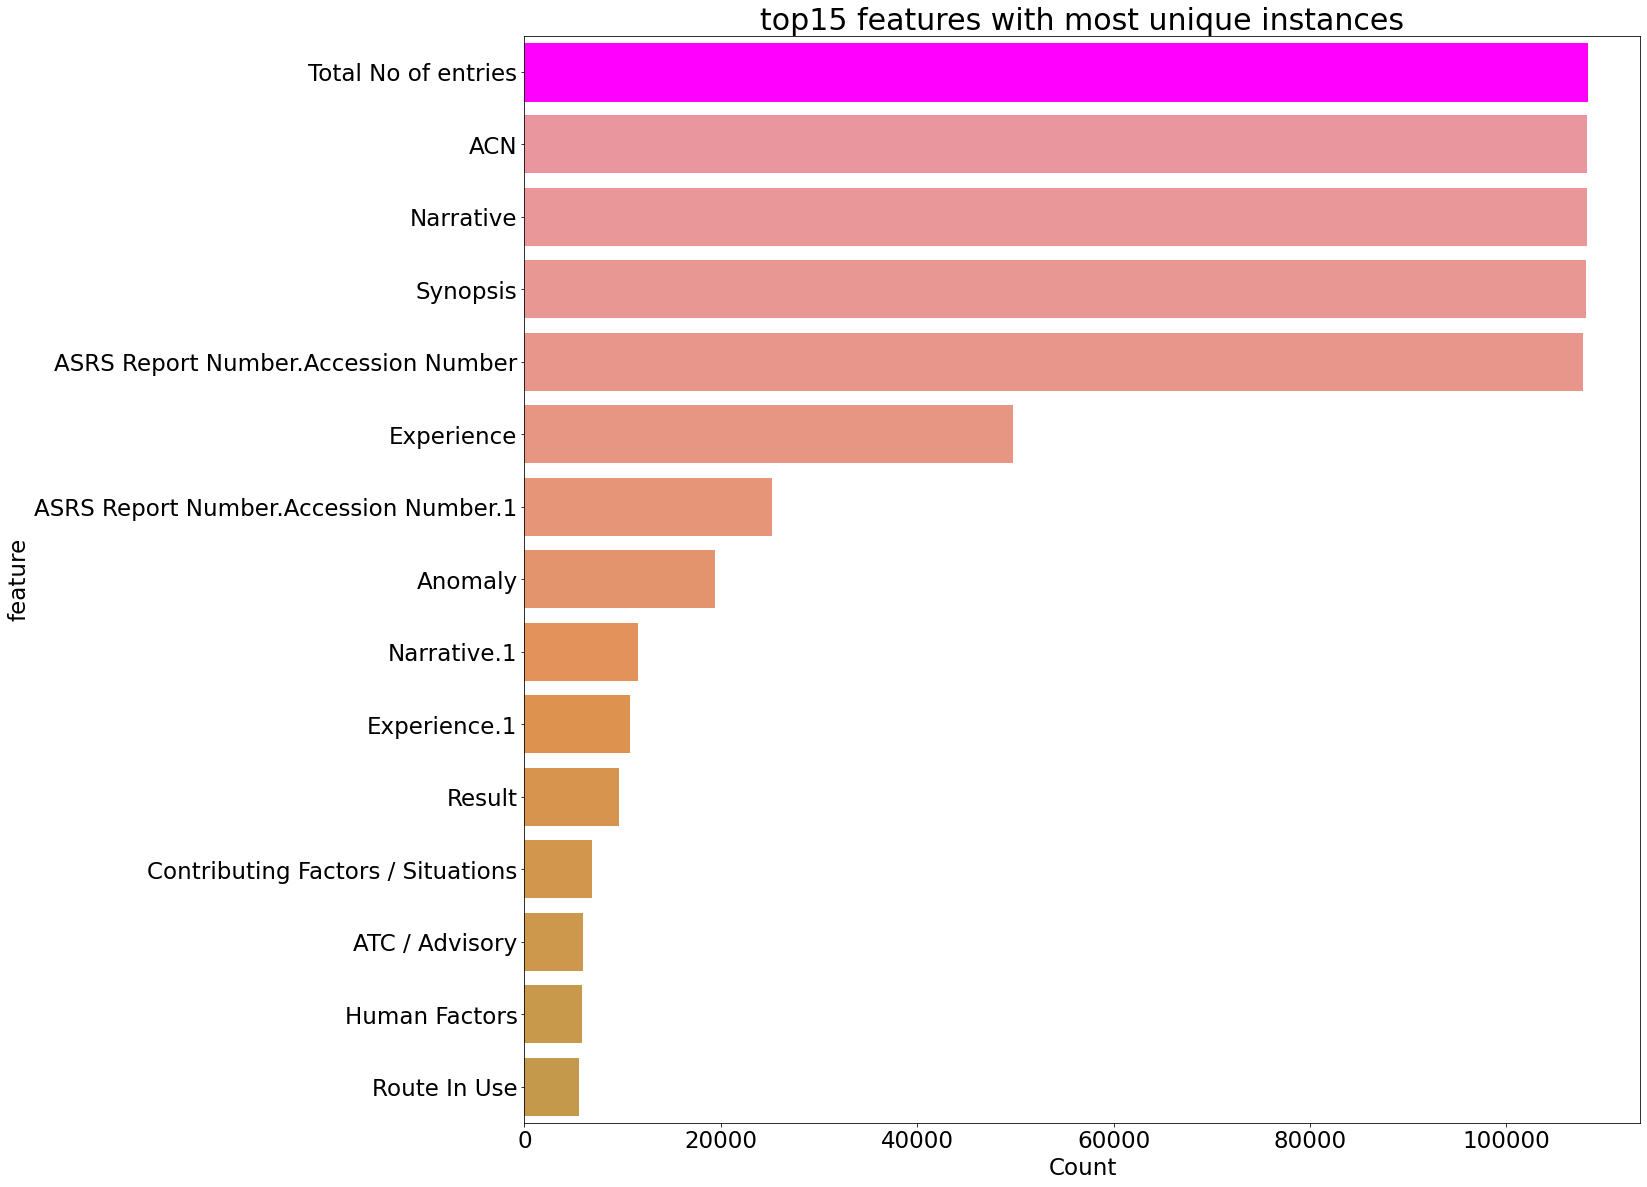

In [28]:
# Barplot of unique features
fig = plt.figure(figsize = (20,20))
ax = sns.barplot(data = my_df, x = 'unique counts', y = 'feature')

# Color the top bar
for bar in ax.patches:
    if bar.get_y() < 0.5: # get_y() returns the bottom coordinate of the rectangle 
                          # given a vertical bar layout --> here '< 0.5' means the topmost bar
        bar.set_color('magenta')

# Plot the 15 most frequent occurences
topX = 15
plt.ylim(topX - 0.5)
plt.xlabel('Count')
plt.title(f"top{topX} features with most unique instances");



* It is expected that ACN, Narrative, Synopsis would have so many entries as there are data
* Why are there slightly less 'ASRS Report Number.Accession Number'?
* Low counts on Locale Reference either
  * because events around a small number of airports (unlikely)
  * because many anonymized data (the actual reason)

* The variety of 'Experience' is not surprising, because it contains hours/years of experience
* The variety in 'Anomaly' is suprisingly high, given that there are only 66 'Anomaly' labels stated in the 'CodingForm.pdf' of the ASRS database
* 'Contributing Factors' and 'Human Factors' is also suprisingly high

**This is due to the fact that these variables are combinations of a small amount of labels.**


Inspect unique instances and completion percentage of the data for each feature:

In [29]:
my_df['compl_percent'] = np.round(100 * (1 - (my_df['nan_features'] / my_df['total_entries_feat'])), 1)
my_df['unique_cnts_scaled'] = my_df['unique counts'] / 1000

# For the next plot below: sort dataframe in descending order of completion percentage
my_df = my_df.sort_values(by = 'compl_percent', ascending = False)

my_df.head()

,feature,unique counts,total_entries_feat,nan_features,compl_percent,unique_cnts_scaled
1,ACN,108241,108241.0,0.0,100.0,108.241
5,State Reference,68,108241.0,0.0,100.0,0.068
97,Synopsis,108090,108241.0,11.0,100.0,108.090
93,Narrative,108223,108241.0,0.0,100.0,108.223
0,Unnamed: 0,4984,108241.0,0.0,100.0,4.984


In [30]:
source = ColumnDataSource(my_df)

f = figure(width = 1800, height = 600, x_range = my_df['feature'])
f.xaxis.major_label_orientation = np.pi/2

abcisses1 = dodge(field_name = 'feature', value = -0.25, range = f.x_range)
abcisses2 = dodge(field_name = 'feature', value = 0, range = f.x_range)
#abcisses3 = dodge(field_name = 'x', value = 0.25, range = f.x_range)

v1 = f.vbar(source = source, x = abcisses1, top = 'unique_cnts_scaled', width = 0.2, color = 'blue', legend_label = "unique counts [thousands]")
v2 = f.vbar(source = source, x = abcisses2, top = 'compl_percent', width = 0.2, color = 'green', legend_label = "completion percentage (how many NaN's)")
#v3 = f.vbar(source = source, x = abcisses3, top = 'valeur 3', width = 0.2, color = 'blue', legend_label = "Valeur 3")

# Create HoverTool
h = HoverTool(renderers = [v1, v2],  # liste de GlyphRenderer avec lesquels on veut intéragir
    
              tooltips = [( "feature", "@feature"), 
                          ("unique counts [thousands]", "@unique_cnts_scaled"),
                          ("completeness percentage", "@compl_percent")
                          ]) # liste de couples d'informations à afficher à coté du point survolé. Les informations que nous affichons sont les coordonnées du point survolé.  
f.add_tools(h)

f.legend.location ='center'
show(f)

In [31]:
# Sort dataframe in descending order of *completenes percentage*
my_df = my_df.sort_values(by = 'compl_percent', ascending = False)

### Heatmap of correlations

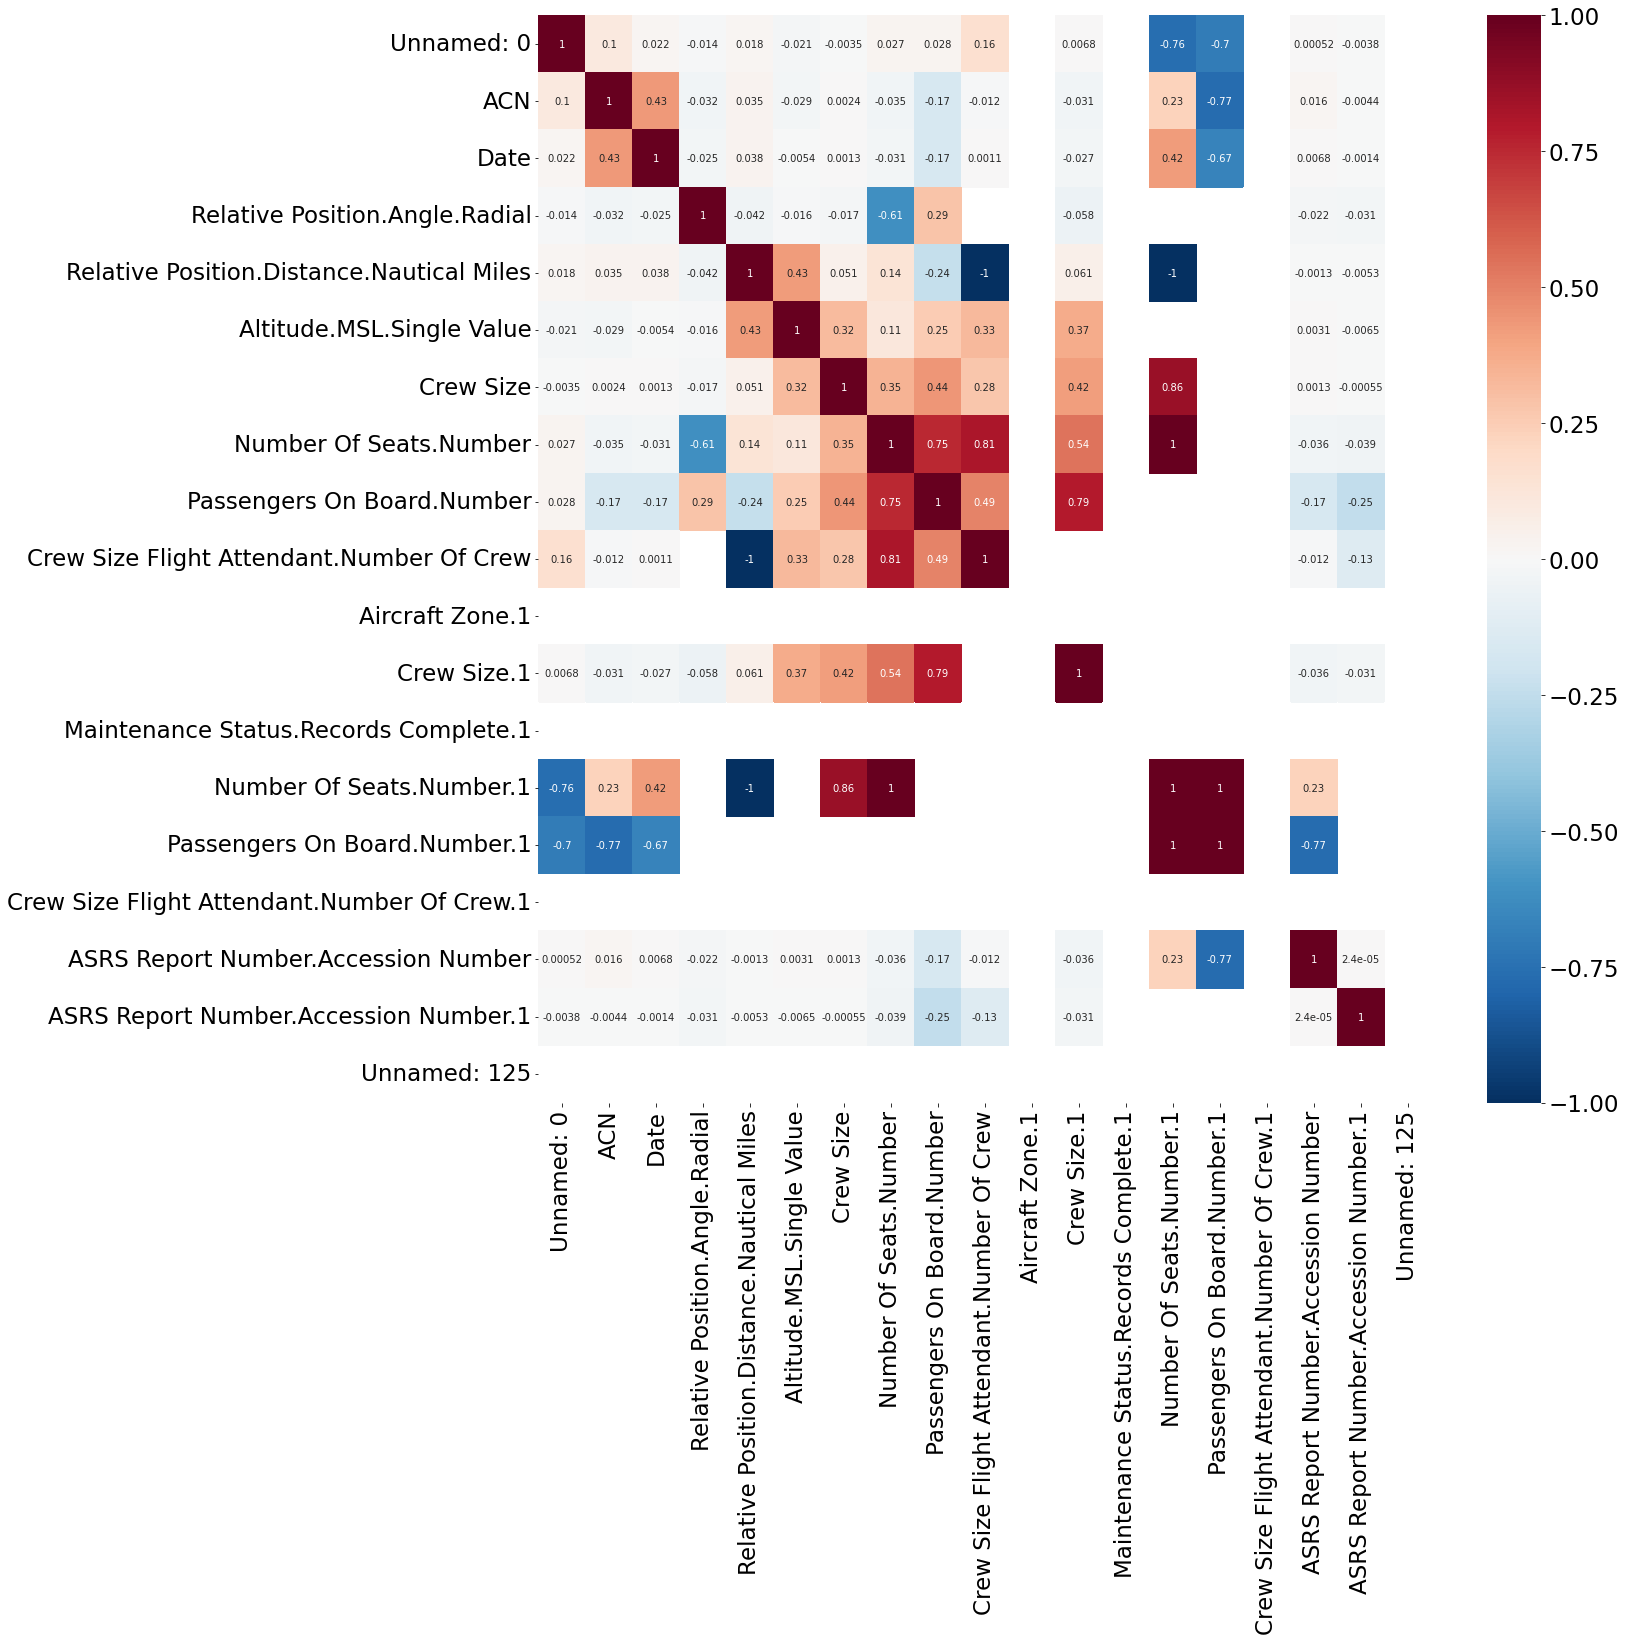

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', center=0);

No significant correlations observed.

### DataViz: Primary Problem

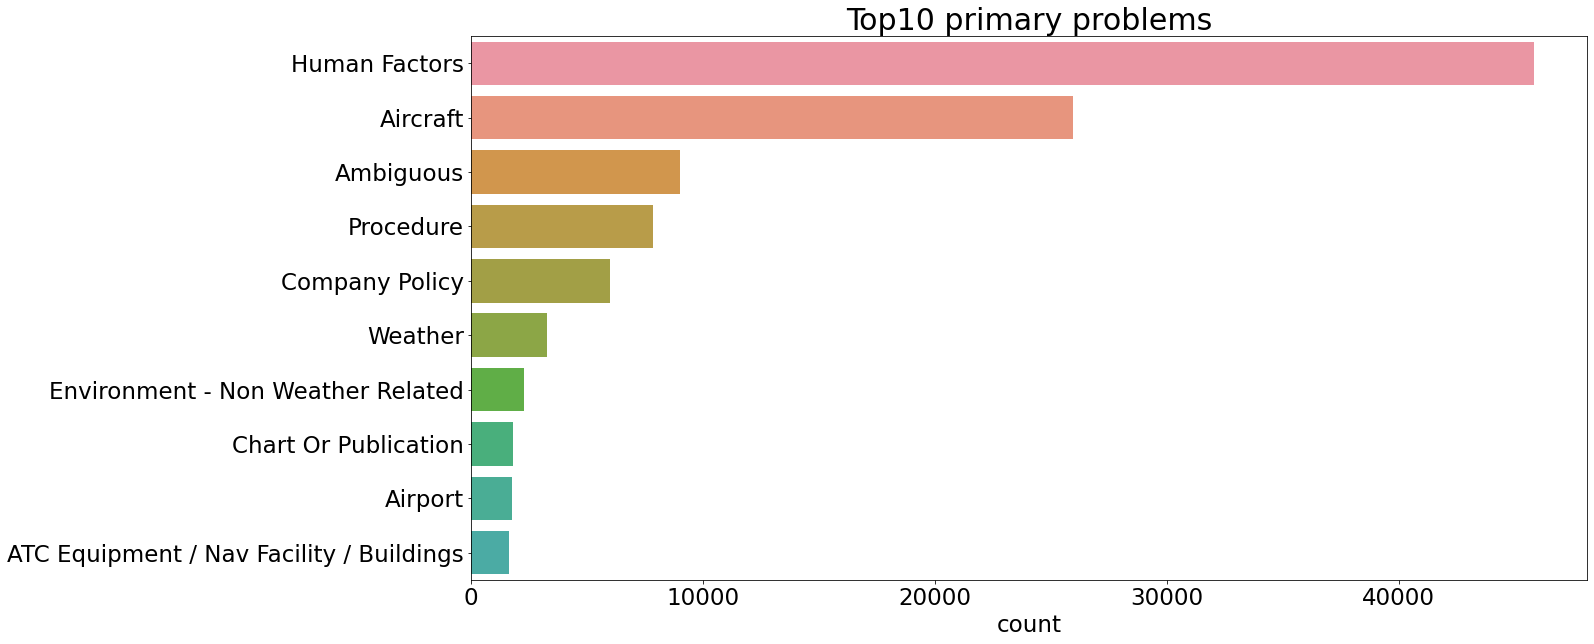

In [33]:
# Instantiate new figure
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(111) # need the ax handle to set the ylabels to None

# Plot in decreasing order
sns.countplot(y = df['Primary Problem'], 
              order = df['Primary Problem'].value_counts().index, 
              orient = 'h')

# Plot settings
plt.title('Top10 primary problems')
ax.set(ylabel = None)
# Plot the 10 most frequent occurences
topX = 10
plt.ylim(topX - 0.5);

### DataViz: Human Factors

In [34]:
# TAKES ABOUT 2min. to EXECUTE 
# Make a list of all 'Human Factor' entries
hum_facts = list()
for entry in df['Human Factors']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    hum_facts = hum_facts + split


KeyboardInterrupt: ignored

In [ ]:
# Countplot:
fig = plt.figure(figsize= (13,7))

# # Plot in decreasing order
sns.countplot(y = hum_facts, 
              order= pd.Series(hum_facts).value_counts().index, # need to transform list to pd.Series for the ordering in countplot()
              orient = 'h') 
plt.title('Human Factors');

### 'Result'

In [ ]:
# TAKES ABOUT 3min. to EXECUTE 
# Make a list of all 'Result' entries
result = list()
for entry in df['Result']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    result = result + split

In [ ]:
# Countplot:
fig = plt.figure(figsize= (13,16))

sns.countplot(y = result, 
              order= pd.Series(result).value_counts().index,  # need to transform list to pd.Series for the ordering in countplot()
              orient = 'h')

# Plot the 20 most frequent occurences
topX = 20
plt.ylim(topX - 0.5)

plt.xticks(rotation=45)
plt.title('Top20 event results');

In [ ]:
# Countplot:
fig = plt.figure(figsize= (13,7))

# # Plot in decreasing order
sns.countplot(y = hum_facts, 
              order= pd.Series(hum_facts).value_counts().index, # need to transform list to pd.Series for the ordering in countplot()
              orient = 'h') 
plt.title('Human Factors');

### 'Anomaly'

In [35]:
#list(df['Anomaly'].unique())#[:30] # show only first 30 entires (unsorted)

#### Labels containing 'other'

While there is no category `'Other Unwanted Situation'` to pick on the search engine, inside `df['Anomaly'].unique()` we find the label: `'Other Unwanted Situation'`.



In [36]:
print("Number of entries with 'Anomaly' == 'Other Unwanted situation':", len(df[df['Anomaly'] == 'Other Unwanted situation']), 
      "\n There are 10 more entries that contain 'Other Unwanted situation' combined with other labels (see countplot at root-label level")

Number of entries with 'Anomaly' == 'Other Unwanted situation': 20 
 There are 10 more entries that contain 'Other Unwanted situation' combined with other labels (see countplot at root-label level


**TBD: Do we drop these data?**

Let's decide once we have identified the desired label for our narratives...

Other occurences of the word 'Other' are:

```
Inflight Event / Encounter Other / Unknown
Flight Deck / Cabin / Aircraft Event Other / Unknown
Ground Event / Encounter Other / Unknown
```

In these cases, 'Other' is present inside the label due to the concatenation (by the ASRS engine) of the root-label with its sublabels, e.g.

`Flight Deck / Cabin / Aircraft Event`

and 

`Other / Unknown`

#### Labels `'Critical'` and `'Less Severe'`

There is a specificity for the labels `'Critical'` and `'Less Severe'`:

'Critical' may appear either as 
* a sublabel of `'Aircraft Equipment Problem'`. In this case it is found together with its root-label: `'Aircraft Equipment Problem Critical;'` 
The  `';' `at the end introduces the next label in the present database entry.

* in this form: `'Conflict Ground Conflict; Critical;'` 
Here it has to be interpreted as a sublabel, since there is no root-label named simply `'Critical'`

</br>

Exactly the same issue happens for `'Less Severe'`

</br> 
To avoid the interpretation of 'Critical' and 'Less Severe' as root-labels, we merge them with their root-label in the situations, where they are separated by a ';'.

To do this, we use **regular expressions**. 

In [37]:
# Write all the entries of 'Anomaly' into a single string using 
# a delimiter that is *not* present in the data, i.e. '$'

# This approach is MUCH FASTER than going through the dataset 
# line-by-line and replacing strings. Ioannis tried the latter;
# takes min. 10' to execute.
# Perhaps the .apply() method is an alternative...?

all_anomaly = ''
all_anomaly = '$'.join(str(entry) for entry in df['Anomaly']) # do not include a ' ' before / after the '$' !

In [38]:
# Inspect the result
# Print does not work, because too large
all_anomaly[:1000]

'Deviation - Altitude Excursion From Assigned Altitude; Deviation / Discrepancy - Procedural Published Material / Policy; Deviation / Discrepancy - Procedural Clearance$ATC Issue All Types; Deviation / Discrepancy - Procedural Published Material / Policy$Deviation - Altitude Crossing Restriction Not Met; Deviation / Discrepancy - Procedural Published Material / Policy; Deviation / Discrepancy - Procedural Clearance$Conflict Ground Conflict; Critical; Deviation / Discrepancy - Procedural Clearance; Ground Incursion Taxiway$Inflight Event / Encounter CFTT / CFIT; Inflight Event / Encounter VFR In IMC; Inflight Event / Encounter Weather / Turbulence$Conflict Airborne Conflict; Deviation - Altitude Excursion From Assigned Altitude$Conflict NMAC$Conflict NMAC; Deviation / Discrepancy - Procedural Published Material / Policy$Inflight Event / Encounter Other / Unknown$Inflight Event / Encounter CFTT / CFIT; Inflight Event / Encounter Unstabilized Approach$Deviation - Altitude Crossing Restric

In [39]:
r = re.findall("Conflict Ground Conflict; Critical", all_anomaly)
print("Found", len(r), "instances")

Found 2782 instances


In [40]:
# Compile Regular Expressions

# These are the expressions we are looking for
r1 = re.compile(r"Conflict Ground Conflict; Critical") 
# Do NOT search for 'Conflict Ground Conflict; Critical;',
# i.e. with a ';' at the end, because some times it is the last entry, 
# so there is no trailing ';'

# Proceed similarly for the other expressions
r2 = re.compile(r"Conflict Ground Conflict; Less Severe")

# Find and substitute
# Make sure the output of the first operation is the input of the next
all_anomaly = r1.sub('Conflict Ground Conflict Critical', all_anomaly)
all_anomaly = r2.sub('Conflict Ground Conflict Less Severe', all_anomaly)

In [41]:
# Write the large text back into a df column, using the '$' separator
df['AnomalyNew'] = all_anomaly.split(sep = '$')

In [42]:
# # Verify the result
# list(df['AnomalyNew'].unique())

#### Countplot for 'Anomaly without combining the sublabels

In [43]:
S = df['AnomalyNew']
S = S.str.split(';', expand= True).stack().reset_index(drop = True)

#Create new df with anomalies and corresponding occurence
freq_anly = pd.DataFrame(index=S)

# strip leading and trailing space
freq_anly.index = freq_anly.index.str.strip()

In [44]:
# Count occurences
freq_anly['No of Anomaly Occurence'] = S.value_counts()
freq_anly = freq_anly.drop_duplicates()
freq_anly = freq_anly.sort_values(by = 'No of Anomaly Occurence', axis = 0, ascending=False)
#freq_anly

In [45]:
freq_anly

,No of Anomaly Occurence
Aircraft Equipment Problem Critical,24831.0
ATC Issue All Types,18273.0
Aircraft Equipment Problem Less Severe,16516.0
Deviation / Discrepancy - Procedural Published Material / Policy,8325.0
Deviation / Discrepancy - Procedural FAR,3806.0
Conflict Airborne Conflict,3400.0
Conflict NMAC,3309.0
Deviation - Track / Heading All Types,3273.0
Deviation / Discrepancy - Procedural Clearance,2533.0
Airspace Violation All Types,2414.0


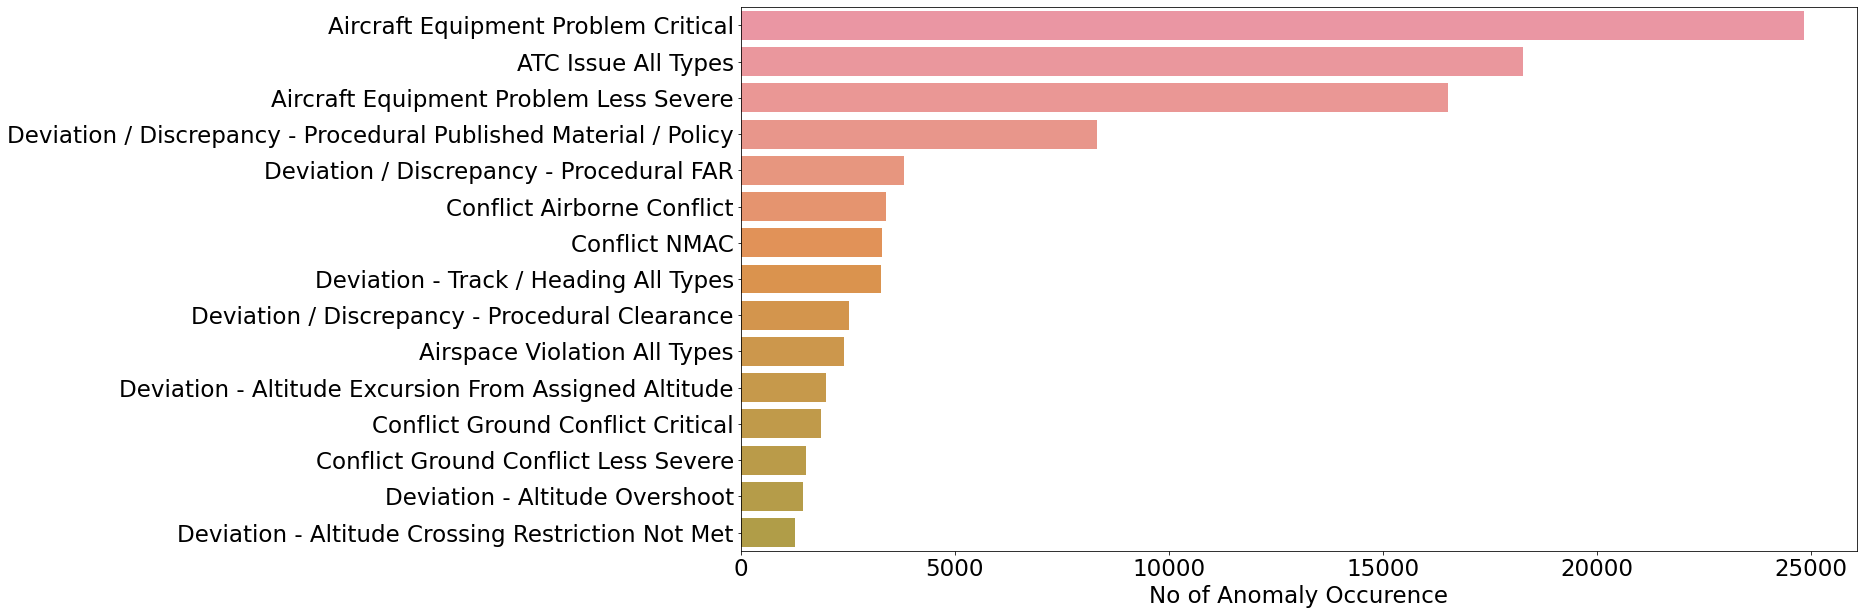

In [46]:
fig = plt.figure(figsize = (20,10)) 
sns.barplot(y = freq_anly.index, x = freq_anly['No of Anomaly Occurence'])
# Plot the 15 most frequent occurences
plt.ylim(14.5);

There is a major issue with this graph: It is at sublabel level, e.g. plots 'Conflict NMAC' and 'Conflict Ground Conflict Critical' as separate lines.

Thus, we lack the overview of the main anomaly labels, a.k.a. 'root-labels'.
We deal with this in the next section.

#### Gathering the labels with respect to their root-labels

All labels belonging to the same root-label should be merged together, to accurately count the number of occurences at root-label level.

Especially in the case of root-labels e.g. `Deviation / Discrepancy `, which has several sublabels ('Clearance', 'FAR', 'Hazardous Material Violation' ... [total of 11 labels]), that are otherwise masked in the noise of their individual sublabel counts.

The root-label with most sublabels is 'Ground Event / Encounter': 14 sublabels are listed in the database, of which 'Loss of VLOS (UAS)' applies to UAS entries, which we have dropped --> effectively 13 sublabels in our dataset.

In [47]:
# # HAVE NOT YET USED THIS CELL
# # List of the primary anomaly issues (root-labels)
# # Copied from the ASRS Search Wizard
# prim_anomalies = [
#                   'Aircraft Equipment Problem',
#                   'Airspace Violation',
#                   'ATC Issue',
#                   'Conflict'
#                   'Deviation - Altitude',
#                   'Deviation / Discrepancy - Procedural',
#                   'Deviation - Speed',
#                   'Deviation - Track / Heading',
#                   'Flight Deck / Cabin / Aircraft Event',
#                   'Ground Event / Encounter',
#                   'Ground Excursion',
#                   'Ground Incursion',
#                   'Inflight Event / Encounter',
#                   'No Specific Anomaly Occurred'
#                  ]

We will use RegEx's.

We have tried the implementation using loops, but it is too slow.

RegEx's are faster and more flexible, because we do not need to know the exact name of the labels; their syntactic structure is sufficient.

In [48]:
# Write all the entries of 'Anomaly' into a single string using 
# a delimiter which is not present in the data, i.e. '$'

# This approach is MUCH FASTER than going through the dataset 
# line-by-line and replacing strings. Ioannis tried this approach;
# takes min. 10' to execute.

all_anomaly = ''
all_anomaly = '$'.join(str(entry) for entry in df['AnomalyNew']) # do not include a ' ' before / after the '$' !

In [49]:
# Compile Regular Expressions

############ DELETE THIS  #################
#r = re.findall("Ground Event / Encounter[a-zA-Z0-9_\s\/\(\)\-]+;", all_anomaly) # THIS WORKS, KEEP IT !
#r = re.compile(r"Ground Event / Encounter[a-zA-Z0-9_\s\/\(\)\-]+;")
#r = re.compile(r"Ground\sEvent\s/\sEncounter[a-zA-Z0-9_\s\/\(\)\-]+;") 
#r = re.compile(r"Ground\sEvent\s/\sEncounter[a-zA-Z0-9_\-\s\/\(\)\-]+;")
############################################

# RegEx for 'Ground Event / Encounter' and its sublabels:
# we name our regex 'r10', to keep the same order of root-labels as on the ASRS wizard
r10 = re.compile(r"""
                  Ground\sEvent\s/\sEncounter  # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                           
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r10.findall(all_anomaly)
len(findings)

9342

In [50]:
# Examine the unique list of findings and compare with ASRS search wizard
set(findings)

{'Ground Event / Encounter Aircraft',
 'Ground Event / Encounter FOD',
 'Ground Event / Encounter Fuel Issue',
 'Ground Event / Encounter Gear Up Landing',
 'Ground Event / Encounter Ground Equipment Issue',
 'Ground Event / Encounter Ground Strike - Aircraft',
 'Ground Event / Encounter Jet Blast',
 'Ground Event / Encounter Loss Of Aircraft Control',
 'Ground Event / Encounter Object',
 'Ground Event / Encounter Other / Unknown',
 'Ground Event / Encounter Person / Animal / Bird',
 'Ground Event / Encounter Vehicle',
 'Ground Event / Encounter Weather / Turbulence'}

In [51]:
len(set(findings)) # should be 13

13

In [52]:
# Find and substitute
repl_result = re.subn(r10, 'Ground Event / Encounter', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

9342 instances have been replaced


In [53]:
# # Check the result
#all_anomaly[:1000]

##### 'Aircraft Equipment Problem'

In [54]:
# Compile Regular Expressions

# RegEx for 'Aircraft Equipment Problem' and its sublabels:
r1 = re.compile(r"""
                  Aircraft\sEquipment\sProblem  # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r1.findall(all_anomaly)
len(findings)

42338

In [55]:
# Examine the unique list of findings and compare with ASRS search wizard
set(findings)

{'Aircraft Equipment Problem Critical',
 'Aircraft Equipment Problem Less Severe'}

In [56]:
len(set(findings)) # should be 2

2

In [57]:
# Find and substitute
repl_result = re.subn(r1, 'Aircraft Equipment Problem', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

42338 instances have been replaced


###### Tree representation

In [58]:
pip install ete3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.4 MB/s 
  Created wheel for ete3: filename=ete3-3.1.2-py3-none-any.whl size=2273013 sha256=b6df2bffbe8deba4d4e5f89aeda485ee061f0048b26739db30773d0e2ddc0d7d
  Stored in directory: /root/.cache/pip/wheels/17/fd/e2/6ac384d8c2484789304657dde01b96d7ab83f4f1dd96d266df
Successfully built ete3


In [59]:
# http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html
# pip install ete3
from ete3 import Tree

tree_branches = ""
for finding in set(findings):
 # tree_branches = finding + ', ' + tree_branches
  #tree_branches = ''.join(finding)
  tree_branches = ', '.join(finding for finding in set(findings)) # do not include a ' ' before / after the '$' !

tree_branches

'Aircraft Equipment Problem Less Severe, Aircraft Equipment Problem Critical'

In [60]:
unrooted_tree = Tree( "(" + tree_branches + ");" )
print(unrooted_tree)


   /-Aircraft Equipment Problem Less Severe
--|
   \-Aircraft Equipment Problem Critical


In [61]:
rooted_tree = Tree( "(A,B,C,D);" )
print(rooted_tree)


   /-A
  |
  |--B
--|
  |--C
  |
   \-D


In [62]:
rooted_tree = Tree( "((A,B),(C,D, (F)));" )
print(rooted_tree)


      /-A
   /-|
  |   \-B
--|
  |   /-C
  |  |
   \-|--D
     |
      \- /-F


##### 'Airspace Violation'

In [63]:
# Compile Regular Expressions

# RegEx for 'Airspace Violation' and its sublabels:
r2 = re.compile(r"""
                  Airspace\sViolation          # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r2.findall(all_anomaly)
len(findings)

4403

In [64]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings))

print("Number of findings:", len(set(findings)), "(should be 1)")

# Find and substitute
repl_result = re.subn(r2, 'Airspace Violation', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Airspace Violation All Types'}
Number of findings: 1 (should be 1)
4403 instances have been replaced


##### /!\ 'ATC Issue'

In [65]:
# Compile Regular Expressions

# RegEx for 'ATC Issue' and its sublabels:
r3 = re.compile(r"""
                  ATC\sIssue                   # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r3.findall(all_anomaly)
len(findings)

18276

In [66]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings))

print("Number of findings:", len(set(findings)), "(should be 1)")

# Find and substitute
repl_result = re.subn(r3, 'ATC Issue', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'ATC Issued Improper Clrnc', 'ATC Issued GAR', 'ATC Issue All Types', 'ATC Issued Abort'}
Number of findings: 4 (should be 1)
18276 instances have been replaced


According to the search engine wizard, there should be only 1 sublabel of 'ATC Issue': 'All Types'.

**However, our RegEx finds 4 sublabels!**

These are also not mentioned in the CodingForm.pdf from the ASRS database!

This is yet another demonstration of the power of RegEx's that help us discover unexpected instances.

##### /!\ 'Conflict'

In [67]:
# Compile Regular Expressions

# RegEx for 'Conflict' and its sublabels:
r4 = re.compile(r"""
                  Conflict                     # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r4.findall(all_anomaly)
len(findings)

19486

In [68]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 4)\n")

# Find and substitute
repl_result = re.subn(r4, 'Conflict', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Conflicting R/A', 'Conflicting Tower Information', 'Confliction', 'Conflict Alerts', 'Conflict Airborne Conflict', 'Conflict Alert', 'Conflicting Taxi Instructions', 'Conflict RE Arr Effective Date', 'Conflict Alert On False Target', 'Conflict Alert Anomaly', 'Conflict NMAC', 'Conflict Alert System Not Audible', 'Conflict ARR/Dep Spacing', 'Conflict with Boat', 'Conflicting Proc', 'Conflict Ground Conflict Critical', 'Conflict ATC Procs', 'Conflicting Tfc', 'Conflict Ground Conflict Less Severe', 'Conflict/ Acft Confign', 'Conflict Activity'} 

Number of findings: 21 (should be 4)

19486 instances have been replaced


In [69]:
# There is indeed a 'Conflict with Boat' entry in the original data !
my_str = str(list(df['Anomaly'].unique()))
print(my_str.find('Conflict with Boat')) 

1857058


###### Tree representation

In [70]:
from ete3 import Tree
# http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html

tree_branches = ""
for finding in set(findings):
 # tree_branches = finding + ', ' + tree_branches
  #tree_branches = ''.join(finding)
  tree_branches = ', '.join(finding for finding in set(findings)) # do not include a ' ' before / after the '$' !

tree_branches


'Conflicting R/A, Conflicting Tower Information, Confliction, Conflict Alerts, Conflict Airborne Conflict, Conflict Alert, Conflicting Taxi Instructions, Conflict RE Arr Effective Date, Conflict Alert On False Target, Conflict Alert Anomaly, Conflict NMAC, Conflict Alert System Not Audible, Conflict ARR/Dep Spacing, Conflict with Boat, Conflicting Proc, Conflict Ground Conflict Critical, Conflict ATC Procs, Conflicting Tfc, Conflict Ground Conflict Less Severe, Conflict/ Acft Confign, Conflict Activity'

In [71]:
unrooted_tree = Tree( "(" + tree_branches + ");" )
print(unrooted_tree)


   /-Conflicting R/A
  |
  |--Conflicting Tower Information
  |
  |--Confliction
  |
  |--Conflict Alerts
  |
  |--Conflict Airborne Conflict
  |
  |--Conflict Alert
  |
  |--Conflicting Taxi Instructions
  |
  |--Conflict RE Arr Effective Date
  |
  |--Conflict Alert On False Target
  |
  |--Conflict Alert Anomaly
  |
--|--Conflict NMAC
  |
  |--Conflict Alert System Not Audible
  |
  |--Conflict ARR/Dep Spacing
  |
  |--Conflict with Boat
  |
  |--Conflicting Proc
  |
  |--Conflict Ground Conflict Critical
  |
  |--Conflict ATC Procs
  |
  |--Conflicting Tfc
  |
  |--Conflict Ground Conflict Less Severe
  |
  |--Conflict/ Acft Confign
  |
   \-Conflict Activity


##### 'Deviation / Altitude'

In [72]:
# Compile Regular Expressions

# RegEx for 'Deviation - Altitude' and its sublabels:
r5 = re.compile(r"""
                  Deviation\s\-\sAltitude       # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r5.findall(all_anomaly)
len(findings)

11430

In [73]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 4)\n")

# Find and substitute
repl_result = re.subn(r5, 'Deviation - Altitude', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Deviation - Altitude Overshoot', 'Deviation - Altitude Undershoot', 'Deviation - Altitude Excursion From Assigned Altitude', 'Deviation - Altitude Crossing Restriction Not Met'} 

Number of findings: 4 (should be 4)

11430 instances have been replaced


##### /!\ 'Deviation / Discrepancy - Procedural'

In [74]:
# Compile Regular Expressions

# RegEx for 'Deviation / Discrepancy - Procedural' and its sublabels:
r6 = re.compile(r"""
                  Deviation\s/\sDiscrepancy\s\-\sProcedural       # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r6.findall(all_anomaly)
len(findings)

104323

In [75]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 11)\n")

# Find and substitute
repl_result = re.subn(r6, 'Deviation / Discrepancy - Procedural', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Deviation / Discrepancy - Procedural FAR', 'Deviation / Discrepancy - Procedural Unauthorized Flight Operations (UAS)', 'Deviation / Discrepancy - Procedural Other / Unknown', 'Deviation / Discrepancy - Procedural Hazardous Material Violation', 'Deviation / Discrepancy - Procedural MEL / CDL', 'Deviation / Discrepancy - Procedural Maintenance', 'Deviation / Discrepancy - Procedural Landing Without Clearance', 'Deviation / Discrepancy - Procedural Security', 'Deviation / Discrepancy - Procedural Published Material / Policy', 'Deviation / Discrepancy - Procedural Weight And Balance', 'Deviation / Discrepancy - Procedural Clearance'} 

Number of findings: 11 (should be 11)

104323 instances have been replaced


Strange that we found 

`'Deviation / Discrepancy - Procedural Unauthorized Flight Operations (UAS)'`

**>>Examine this later in more detail.<<**

In [76]:
#val = df[df['Anomaly'].str.contains('Deviation / Discrepancy - Procedural Unauthorized Flight Operations (UAS)')]

In [77]:
#val.head()

##### 'Deviation - Procedural'

In [78]:
# Compile Regular Expressions

# RegEx for 'Deviation - Speed' and its sublabels:
r7 = re.compile(r"""
                  Deviation\s\-\sSpeed       # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r7.findall(all_anomaly)
len(findings)

2977

In [79]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 1)\n")

# Find and substitute
repl_result = re.subn(r7, 'Deviation - Speed', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Deviation - Speed All Types'} 

Number of findings: 1 (should be 1)

2977 instances have been replaced


##### 'Deviation - Track / Heading'

In [80]:
# Compile Regular Expressions

# RegEx for 'Deviation - Track / Heading' and its sublabels:
r8 = re.compile(r"""
                  Deviation\s\-\sTrack\s/\sHeading       # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r8.findall(all_anomaly)
len(findings)

9153

In [81]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 1)\n")

# Find and substitute
repl_result = re.subn(r8, 'Deviation - Track / Heading', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Deviation - Track / Heading All Types'} 

Number of findings: 1 (should be 1)

9153 instances have been replaced


##### 'Flight Deck / Cabin / Aircraft Event'

In [82]:
# Compile Regular Expressions

# RegEx for 'Flight Deck / Cabin / Aircraft Event' and its sublabels:
r9 = re.compile(r"""
                  Flight\sDeck\s/\sCabin\s/\sAircraft\sEvent       # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r9.findall(all_anomaly)
len(findings)

8809

In [83]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 5)\n")

# Find and substitute
repl_result = re.subn(r9, 'Flight Deck / Cabin / Aircraft Event', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Flight Deck / Cabin / Aircraft Event Smoke / Fire / Fumes / Odor', 'Flight Deck / Cabin / Aircraft Event Illness / Injury', 'Flight Deck / Cabin / Aircraft Event Passenger Electronic Device', 'Flight Deck / Cabin / Aircraft Event Passenger Misconduct', 'Flight Deck / Cabin / Aircraft Event Other / Unknown'} 

Number of findings: 5 (should be 5)

8809 instances have been replaced


##### 'Ground Excursion'

In [84]:
# Compile Regular Expressions

# RegEx for 'Ground Excursion' and its sublabels:
r11 = re.compile(r"""
                  Ground\sExcursion            # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r11.findall(all_anomaly)
len(findings)

2472

In [85]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 3)\n")

# Find and substitute
repl_result = re.subn(r11, 'Ground Excursion', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Ground Excursion Ramp', 'Ground Excursion Runway', 'Ground Excursion Taxiway'} 

Number of findings: 3 (should be 3)

2472 instances have been replaced


##### 'Ground Incursion'

In [86]:
# Compile Regular Expressions

# RegEx for 'Ground Incursion' and its sublabels:
r12 = re.compile(r"""
                  Ground\sIncursion            # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r12.findall(all_anomaly)
len(findings)

5882

In [87]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 3)\n")

# Find and substitute
repl_result = re.subn(r12, 'Ground Incursion', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Ground Incursion Ramp', 'Ground Incursion Runway', 'Ground Incursion Taxiway'} 

Number of findings: 3 (should be 3)

5882 instances have been replaced


##### 'Inflight Event / Encounter'

In [88]:
# Compile Regular Expressions

# RegEx for 'Inflight Event / Encounter' and its sublabels:
r13 = re.compile(r"""
                  Inflight\sEvent\s/\sEncounter  # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r13.findall(all_anomaly)
len(findings)

24408

In [89]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 13 - [1 related to UAS])\n")

# Find and substitute
repl_result = re.subn(r13, 'Inflight Event / Encounter', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'Inflight Event / Encounter Weather / Turbulence', 'Inflight Event / Encounter Unstabilized Approach', 'Inflight Event / Encounter VFR In IMC', 'Inflight Event / Encounter Other / Unknown', 'Inflight Event / Encounter Bird / Animal', 'Inflight Event / Encounter Wake Vortex Encounter', 'Inflight Event / Encounter Loss Of Aircraft Control', 'Inflight Event / Encounter Laser', 'Inflight Event / Encounter Aircraft', 'Inflight Event / Encounter CFTT / CFIT', 'Inflight Event / Encounter Object', 'Inflight Event / Encounter Fuel Issue'} 

Number of findings: 12 (should be 13 - [1 related to UAS])

24408 instances have been replaced


##### 'No Specific Anomaly Occurred'

In [90]:
# Compile Regular Expressions

# RegEx for 'No Specific Anomaly Occurred' and its sublabels:
r14 = re.compile(r"""
                  No\sSpecific\sAnomaly\sOccurred  # use \s instead of ' ', because verbose ignores the latter! 
                  
                  [a-zA-Z0-9_                  # define custom list of characters that should be found at least once 
                                               # corresponds to \w and we extend it with more characters below
                  
                  \-                           # hyphen
                  
                  \s                           # whitespace
                  
                  \/                           # forward slash
                  
                  \(\)]                        # left or right bracket; if detected it means you have not dropped all UAS entries
                                               # keep the ']' at the end; otherwise less matches are found
                   
                  +                            # '+' means 'find at least 1 occurence'
                                
               """, 
               re.VERBOSE)                     # VERBOSE allows us to write the RegEx in the above, expanded way --> more readable

findings = r14.findall(all_anomaly)
len(findings)

560

In [91]:
# Examine the unique list of findings and compare with ASRS search wizard
print(set(findings), "\n")

print("Number of findings:", len(set(findings)), "(should be 2)\n")

# Find and substitute
repl_result = re.subn(r14, 'No Specific Anomaly Occurred', all_anomaly)
# The re.subn() method returns the new version of the target string after the replacements 
# The second element is the number of replacements it has made

print(repl_result[1], "instances have been replaced")

all_anomaly = repl_result[0]

{'No Specific Anomaly Occurred Unwanted Situation', 'No Specific Anomaly Occurred All Types'} 

Number of findings: 2 (should be 2)

560 instances have been replaced


#### DataViz: Countplot at root-label level

In [92]:
# Write the large text back into a df column, using the '$' separator
df['AnomalyNew1'] = all_anomaly.split(sep = '$')

S = df['AnomalyNew1']
S = S.str.split(';', expand= True).stack().reset_index(drop = True)

In [93]:
#Create new df with anomalies and corresponding occurence
freq_anly = pd.DataFrame(index=S)

# strip leading and trailing space
freq_anly.index = freq_anly.index.str.strip()

# Count occurences
freq_anly['No of Anomaly Occurence'] = S.value_counts()
freq_anly = freq_anly.drop_duplicates()
freq_anly = freq_anly.sort_values(by = 'No of Anomaly Occurence', axis = 0, ascending=False)

freq_anly[:20] # first 20 lines

,No of Anomaly Occurence
Aircraft Equipment Problem,41347.0
ATC Issue,18273.0
Deviation / Discrepancy - Procedural,16467.0
Conflict,10110.0
Deviation - Altitude,4899.0
Deviation - Track / Heading,3273.0
Inflight Event / Encounter,2709.0
Airspace Violation,2414.0
Ground Event / Encounter,2043.0
Flight Deck / Cabin / Aircraft Event,1629.0


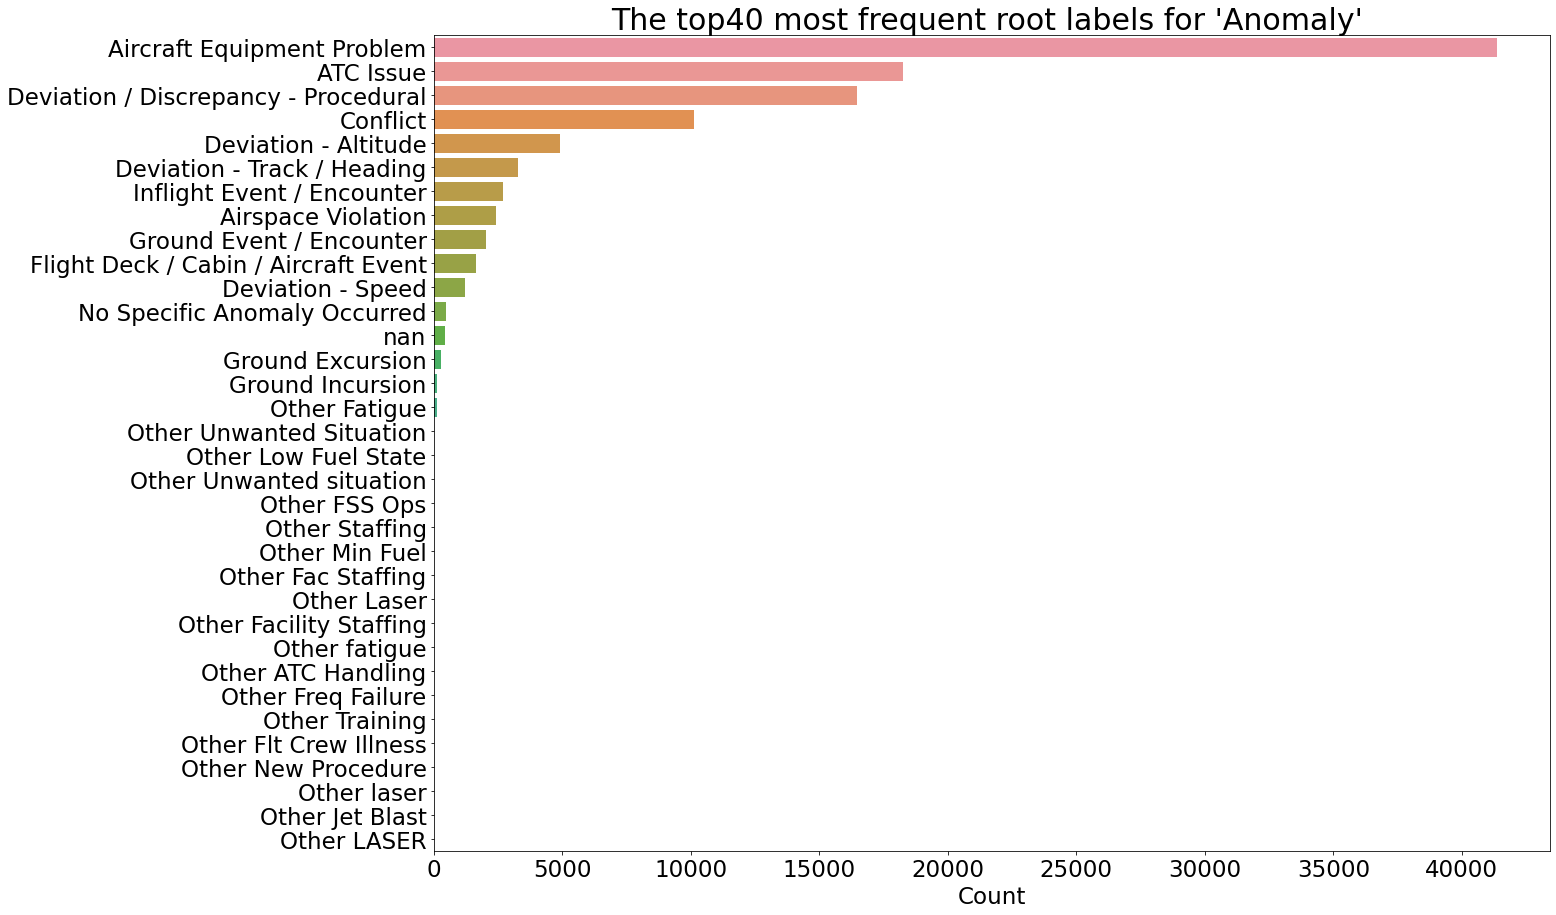

In [103]:
fig = plt.figure(figsize = (20,15)) 
sns.barplot(y = freq_anly.index, x = freq_anly['No of Anomaly Occurence'])
# Plot the 10 most frequent occurences
topX = 40
plt.ylim(topX - 6.5)
plt.xlabel('Count')
plt.title(f"The top{topX} most frequent root labels for 'Anomaly' ");

IDEAS: 
* we can group the rest of the 'Other' root-labels together, to motivate that we drop them (if we do drop them)
* transform into BOKEH figure, when you hover the mouse over the bars, it shows you the type of sublabels that are included. This helps understanding the content of the root-label

In [95]:
df['AnomalyNew1'][5]


'Conflict; Deviation - Altitude'

In [96]:
df['AnomalyNew'][5]

'Conflict Airborne Conflict; Deviation - Altitude Excursion From Assigned Altitude'

### Narratives

#### Select Narratives

In [ ]:
# define a DataFrame of the entries that contain 2 narratives, i.e. Narrative.1 is not empty
nar1_all = df[df['Narrative.1'].isna() == False]

print("Out of a total of", len(df), "entries of events,", "there are", len(nar1_all), "entries that include a 2nd narrative.")

print('Main Narrative: \n')
nar = nar1_all['Narrative'][9]
nar

print('Second Narrative: \n')
nar1 = nar1_all['Narrative.1'][9]
nar1

In [ ]:
# define a DataFrame of the entries that contain 2 narratives, i.e. Narrative.1 is not empty
nar1_all = df[df['Narrative.1'].isna() == False]

In [ ]:
print("Out of a total of", len(df), "entries of events,", "there are", len(nar1_all), "entries that include a 2nd narrative.")

Out of a total of 108241 entries of events, there are 14825 entries that include a 2nd narrative.


In [ ]:
print('Main Narrative: \n')
nar = nar1_all['Narrative'][9]
nar

Main Narrative: 



"During approach to TUS; leg 5 of a 6-leg day; talking to Approach Control; we were cleared direct CALLS for the ILS 11L and cleared to descend to 5;000 FT. We called the airport in sight and were cleared for the visual approach and told to contact Tower. First Officer selected direct POCIB in the FMC; and selected 4;600 FT on the MCP. When we contacted Tower; the Controller said to check altitude and stated the MVA in the area was 5;900 FT. Simultaneously we received a 'Caution Terrain; Caution Obstacle' alert from the GPWS. First Officer executed go-around maneuver. We climbed to clear the alert. Once we were clear of the hazard; we continued our descent to the runway. An s-turn to the south was needed to lose altitude. The terrain feature was in use on both navigation displays; but did not show an immediate threat in front of the airplane. The turn to POCIB was not verbalized; but I was aware of it. This turn only changed our lateral course by a couple of degrees to the right; so I 

In [ ]:
print('Second Narrative: \n')
nar1 = nar1_all['Narrative.1'][9]
nar1

Second Narrative: 



"While on a descent into TUS; we had been given direct CALLS and descend to 5;000 FT. We were high on our profile due to a delayed descent. I had the speedbrakes extended and at some point in the process as we approached 5;000 FT; I extended the landing gear to slow and configure for the approach. Approach asked if we had the airport in sight and we confirmed airport in sight. Approach cleared us for the visual approach and told us to contact Tower. Once cleared for the visual; I selected POCIB in the FMC and went direct and reset the MCP altitude to 4;600 FT. The difference in heading change was less than ten degrees. We were still descending at 250 KTS with speed brake extended and gear down. When we switched to Tower; Tower said 'Check altitude; minimum vectoring in that area is 5;900 FT.' We were descending through 5;300 FT and within a few miles of POCIB. As Tower tells us this; we receive a GPWS Caution; 'Caution Obstacle Caution Terrain.' Even though it was a visual approach; it

#### DataViz: Wordcloud

In [ ]:
def plot_word_cloud(text, title, stop_words, mask, background_color = "white") :
    """
    Plot a wordcloud of the input variable 'text' using the mask 'mask' and with 'title' as title .
    """
    from wordcloud import WordCloud
    from PIL import Image 
    # PIL: Python Imaging Library. Adds image processing capabilities to your Python interpreter.

    # Define a mask
    mask_coloring = np.array(Image.open(str(mask)))

    # Define the word cloud layer
    wc = WordCloud(background_color=background_color, 
                   max_words=150, 
                   stopwords=stop_words, 
                   mask = mask_coloring,
                   colormap='ocean', # cool # winter # ocean
                   # see list: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                   max_font_size=40, random_state=42)
    
    # Generate and plot the wordcloud
    #plt.figure(figsize= (10,5)) # comment it out if you use subplots
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{title}", fontsize = 15)
    #plt.show() # comment it out if you use subplots

In [ ]:
# Define stop word list
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
# we convert it to a set, more efficient (vs. a liste) for the stopword-filtering later 
# 'set' also avoids duplicates

# add additional stop words: 
stop_words.update(['.', ';', '[', ']'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


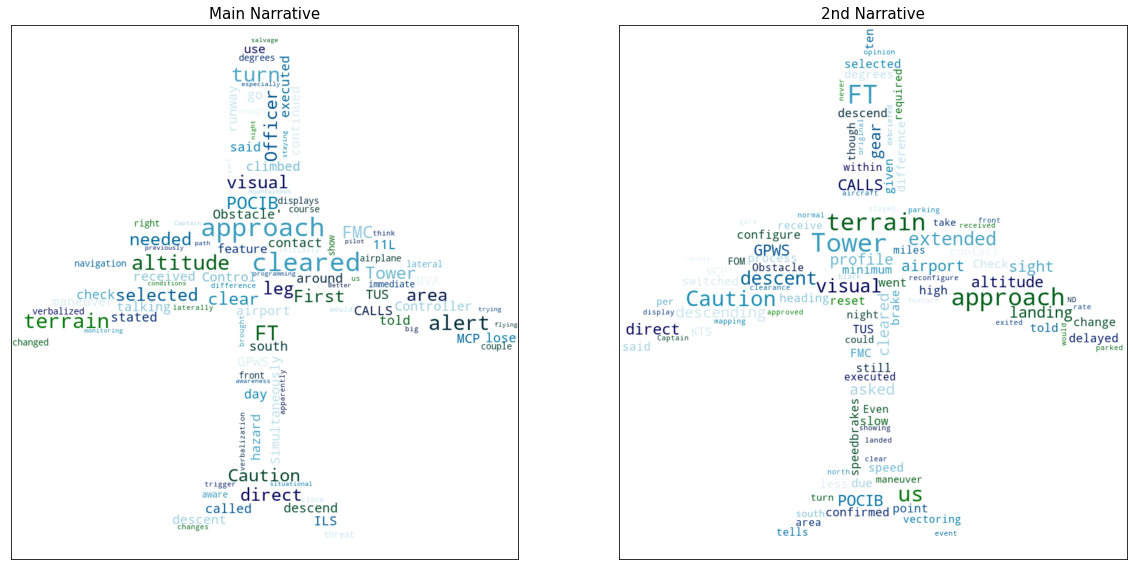

In [ ]:
# call the function defined above:
fig = plt.figure(figsize = (20, 20))

plt.subplot(121)
plot_word_cloud(nar, 'Main Narrative', stop_words, "plane.png")

plt.subplot(122)
plot_word_cloud(nar1, '2nd Narrative', stop_words, "plane.png")

#### DataViz: Worcloud of All naratives

In [ ]:
# Write all narratives of the dataset into a single string 
all_nar = ''
all_nar = ' '.join(str(entry) for entry in df['Narrative'])
len(all_nar)

160209560

In [ ]:
fig = plt.figure(figsize = (18, 18))

plot_word_cloud(all_nar, 'All narratives', stop_words, "plane.png")

KeyboardInterrupt: ignored

<Figure size 1296x1296 with 0 Axes>

#### Narrative length distribution

##### All main narratives

In [ ]:
# Create new column in df
df['narr_len'] = pd.Series([len(entry) for entry in df['Narrative']])

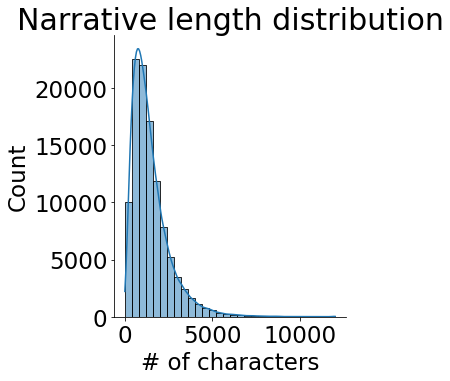

In [ ]:
# Plot
sns.displot(df['narr_len'], bins = 30, kde = True)
plt.xlabel('# of characters')
plt.title('Narrative length distribution');

##### Only entries with 2 narratives

In [ ]:
# Create new column in 'nar1_all' DataFrame
nar1_all['narr_len'] = pd.Series([len(entry) for entry in nar1_all['Narrative']])
nar1_all['narr1_len'] = pd.Series([len(entry) for entry in nar1_all['Narrative.1']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


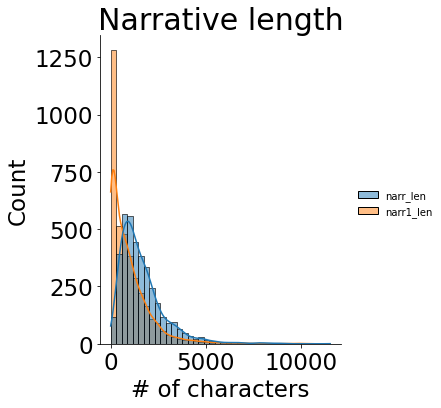

In [ ]:
# Plot
sns.displot([nar1_all['narr_len'], nar1_all['narr1_len']],
            bins = 40, kde = True)
plt.xlabel('# of characters')
plt.title('Narrative length');

The peak in narr1_len is suspicious. Examine the situation:

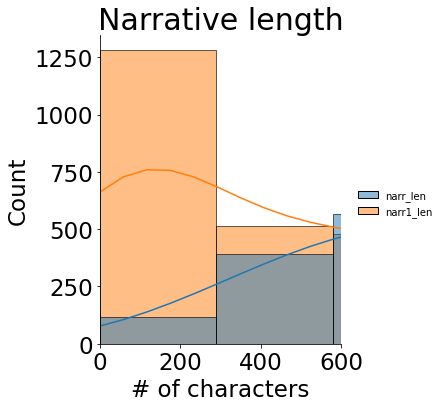

In [ ]:
# Plot (zoom)
sns.displot([nar1_all['narr_len'], nar1_all['narr1_len']],
            bins = 40, kde = True)
plt.xlabel('# of characters')
plt.title('Narrative length')
plt.xlim([0, 600]);

The peak is for narrative.1 with len < 300 characters.

In [ ]:
nar1_all['narr1_len'].unique()

array([1689.,  614.,   77., ..., 1085., 2652.,   nan])

In [ ]:
len(nar1_all[nar1_all['narr1_len'] < 300])

1295

In [ ]:
# Examine the short 'Narrative.1' entries
my_list = [entry for entry in nar1_all[nar1_all['narr1_len'] < 300 ]['Narrative.1']]

In [ ]:
my_list[:10]

['Using both of our experience and available resources we determined it to be a safe option to depart. We may have been able to get a better understanding of the storm had we been in more contact with Dispatch who may have seen more. Or if we had other radar depictions to view in addition to the aircraft radar we might have seen there was another option whether it be delay the departure or take another course.',
 '[Narrative 2 had no additional information.]',
 "Multiple speed assignments and incomplete clearances increased our arrival workload to the point that we accomplished our Descent Checklist late and almost forgot to turn the seatbelt sign on prior to landing. While still cruising at FL250; ATC had assigned 280 knots. Later on the arrival; we were told to comply with the speeds on the arrival. We had not yet been cleared to 'Descend 'via' the GEELA 6;' so we asked if we were cleared to descend 'via' the arrival; and then; for the first time; we were in fact cleared to descend '

In [ ]:
my_list1 = [entry for entry in nar1_all['Narrative.1'] 
            if ('Narrative' in entry or 'narrative' in entry)
            ]
len(my_list1)

3437

In [ ]:
my_list1[:100]

['[Narrative #2 had no additional information.]',
 '[Narrative 2 had no additional information.]',
 'No substantive additional information was included in the secondary narrative.',
 '[Narrative 2 contains no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information]',
 '[Report narrative contained no additional information].',
 '[Report narrative contained no additional information].',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional information.]',
 '[Report narrative contained no additional i

* The 'common denominator' of these entries is the string 'additional information', or 'Additional Information'.
* Some have '[]', others not
* Some have 'no', others not
* the word 'narrative' or 'Narrative' is sometimes preceeds, sometimes follows 'additional information' 

In [ ]:
empty_narr1 = [entry for entry in nar1_all['Narrative.1'] 
            if ('additional information' in entry or 'Additional Information' in entry)]

In [ ]:
print("Out of a total of", len(nar1_all), "non-NaN 'Narrative.1' entries, there are\n", len(empty_narr1), "effectively empty 'Narrative.1' entries, such as '[Report Narrative Contained No Additional Information.]'")

Out of a total of 14825 non-NaN 'Narrative.1' entries, there are
 3494 effectively empty 'Narrative.1' entries, such as '[Report Narrative Contained No Additional Information.]'
